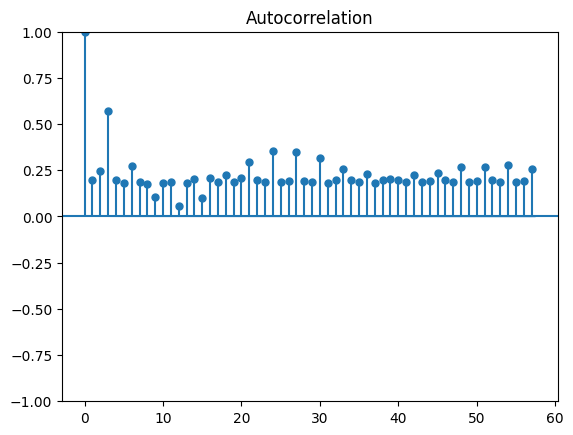

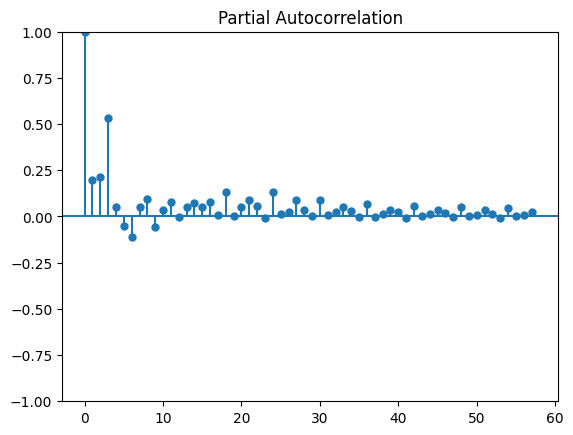

In [ ]:
import pandas as pd
import bike_count
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_parquet(Path("data") / "train.parquet").reset_index(drop=True)

X = data[["date", "log_bike_count"]].set_index("date", drop=True)

series = X["log_bike_count"]


plot_acf(series)
plot_pacf(series)
plt.show()

In [1]:
from prophet import Prophet
import pandas as pd
import joblib
from pathlib import Path


data = pd.read_parquet(Path("data") / "train.parquet").reset_index(drop=True)
data.to_csv("train.csv")

counter_ids = data["counter_id"].unique()

models = {}
predictions = {}

future_periods = 30 * 24

for counter_id in counter_ids:
    print(f"Processing counter: {counter_id}")

    df_counter = data[data["counter_id"] == counter_id]

    df_prophet = df_counter[["date", "log_bike_count"]].rename(
        columns={"date": "ds", "log_bike_count": "y"}
    )

    model = Prophet(
        yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True
    )
    model.fit(df_prophet)

    models[counter_id] = model

joblib.dump(models, "models.pkl")

c:\Users\diane\anaconda3\envs\bikes-count\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Processing counter: 100007049-102007049


17:45:47 - cmdstanpy - INFO - Chain [1] start processing
17:45:48 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100007049-101007049


17:45:50 - cmdstanpy - INFO - Chain [1] start processing
17:45:51 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100036718-104036718


17:45:53 - cmdstanpy - INFO - Chain [1] start processing
17:45:54 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100036718-103036718


17:45:55 - cmdstanpy - INFO - Chain [1] start processing
17:45:56 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100036719-104036719


17:45:57 - cmdstanpy - INFO - Chain [1] start processing
17:45:58 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100036719-103036719


17:45:59 - cmdstanpy - INFO - Chain [1] start processing
17:46:01 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100042374-110042374


17:46:02 - cmdstanpy - INFO - Chain [1] start processing
17:46:03 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100042374-109042374


17:46:04 - cmdstanpy - INFO - Chain [1] start processing
17:46:06 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100044493-SC


17:46:07 - cmdstanpy - INFO - Chain [1] start processing
17:46:09 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047542-103047542


17:46:10 - cmdstanpy - INFO - Chain [1] start processing
17:46:11 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047542-104047542


17:46:13 - cmdstanpy - INFO - Chain [1] start processing
17:46:14 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047545-103047545


17:46:16 - cmdstanpy - INFO - Chain [1] start processing
17:46:18 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047545-104047545


17:46:20 - cmdstanpy - INFO - Chain [1] start processing
17:46:21 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047546-104047546


17:46:23 - cmdstanpy - INFO - Chain [1] start processing
17:46:24 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047546-103047546


17:46:26 - cmdstanpy - INFO - Chain [1] start processing
17:46:27 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047547-104047547


17:46:29 - cmdstanpy - INFO - Chain [1] start processing
17:46:31 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047547-103047547


17:46:32 - cmdstanpy - INFO - Chain [1] start processing
17:46:34 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047548-103047548


17:46:35 - cmdstanpy - INFO - Chain [1] start processing
17:46:36 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100047548-104047548


17:46:38 - cmdstanpy - INFO - Chain [1] start processing
17:46:40 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100049407-353255860


17:46:41 - cmdstanpy - INFO - Chain [1] start processing
17:46:45 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100049407-353255859


17:46:47 - cmdstanpy - INFO - Chain [1] start processing
17:46:50 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100050876-103050876


17:46:52 - cmdstanpy - INFO - Chain [1] start processing
17:46:53 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100050876-104050876


17:46:55 - cmdstanpy - INFO - Chain [1] start processing
17:46:56 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056046-SC


17:46:58 - cmdstanpy - INFO - Chain [1] start processing
17:46:59 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056047-SC


17:47:00 - cmdstanpy - INFO - Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056223-SC


17:47:02 - cmdstanpy - INFO - Chain [1] start processing
17:47:05 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056226-104056226


17:47:07 - cmdstanpy - INFO - Chain [1] start processing
17:47:09 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056226-103056226


17:47:11 - cmdstanpy - INFO - Chain [1] start processing
17:47:12 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056327-103056327


17:47:14 - cmdstanpy - INFO - Chain [1] start processing
17:47:16 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056327-104056327


17:47:17 - cmdstanpy - INFO - Chain [1] start processing
17:47:19 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056329-104056329


17:47:21 - cmdstanpy - INFO - Chain [1] start processing
17:47:22 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056329-103056329


17:47:23 - cmdstanpy - INFO - Chain [1] start processing
17:47:24 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056330-104056330


17:47:25 - cmdstanpy - INFO - Chain [1] start processing
17:47:27 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056330-103056330


17:47:29 - cmdstanpy - INFO - Chain [1] start processing
17:47:31 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056331-104056331


17:47:32 - cmdstanpy - INFO - Chain [1] start processing
17:47:33 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056331-103056331


17:47:34 - cmdstanpy - INFO - Chain [1] start processing
17:47:35 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056332-103056332


17:47:37 - cmdstanpy - INFO - Chain [1] start processing
17:47:39 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056332-104056332


17:47:40 - cmdstanpy - INFO - Chain [1] start processing
17:47:41 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056334-103056334


17:47:43 - cmdstanpy - INFO - Chain [1] start processing
17:47:44 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056334-104056334


17:47:46 - cmdstanpy - INFO - Chain [1] start processing
17:47:48 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056335-104056335


17:47:51 - cmdstanpy - INFO - Chain [1] start processing
17:47:52 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056335-103056335


17:47:55 - cmdstanpy - INFO - Chain [1] start processing
17:47:56 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056336-106056336


17:47:57 - cmdstanpy - INFO - Chain [1] start processing
17:47:59 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100056336-105056336


17:48:01 - cmdstanpy - INFO - Chain [1] start processing
17:48:02 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057329-104057329


17:48:04 - cmdstanpy - INFO - Chain [1] start processing
17:48:05 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057329-103057329


17:48:07 - cmdstanpy - INFO - Chain [1] start processing
17:48:08 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057380-104057380


17:48:11 - cmdstanpy - INFO - Chain [1] start processing
17:48:12 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057380-103057380


17:48:14 - cmdstanpy - INFO - Chain [1] start processing
17:48:16 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057445-103057445


17:48:17 - cmdstanpy - INFO - Chain [1] start processing
17:48:18 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100057445-104057445


17:48:20 - cmdstanpy - INFO - Chain [1] start processing
17:48:21 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100060178-102060178


17:48:22 - cmdstanpy - INFO - Chain [1] start processing
17:48:24 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100060178-101060178


17:48:25 - cmdstanpy - INFO - Chain [1] start processing
17:48:27 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100063175-353277233


17:48:28 - cmdstanpy - INFO - Chain [1] start processing
17:48:31 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 100063175-353277235


17:48:33 - cmdstanpy - INFO - Chain [1] start processing
17:48:35 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 300014702-353245972


17:48:36 - cmdstanpy - INFO - Chain [1] start processing
17:48:37 - cmdstanpy - INFO - Chain [1] done processing


Processing counter: 300014702-353245971


17:48:38 - cmdstanpy - INFO - Chain [1] start processing
17:48:39 - cmdstanpy - INFO - Chain [1] done processing


['models.pkl']

In [2]:
import pandas as pd
from prophet import Prophet


import joblib

models = joblib.load("models.pkl")

test_data = pd.read_parquet("data/final_test.parquet")
test_data.to_csv("data/final_test.csv")

predictions = []


for _, row in test_data.iterrows():
    counter_id = row["counter_id"]
    date = row["date"]

    if counter_id in models:
        model = models[counter_id]

        future_df = pd.DataFrame({"ds": [date]})

        forecast = model.predict(future_df)
        predicted_value = forecast["yhat"].iloc[0]
    else:
        predicted_value = None

    predictions.append(predicted_value)

test_data["log_bike_count"] = predictions

submission = test_data[["log_bike_count"]]
submission.to_csv("submission.csv")

In [3]:
submission.head()

,log_bike_count
0,2.904889
1,0.299757
2,-0.099529
3,-0.247391
4,0.135073


In [5]:
xgb = pd.read_csv('xgb_raw2.csv')
xgb.head()

,Id,log_bike_count
0,0,0.320217
1,1,1.676620
2,2,2.350413
3,3,0.952207
4,4,0.683445


In [6]:
submission["Id"] = [i for i in range(len(submission))]

C:\Users\diane\AppData\Local\Temp\ipykernel_21700\111435344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Id"] = [i for i in range(len(submission))]


In [7]:
submission.head()

,log_bike_count,Id
0,2.904889,0
1,0.299757,1
2,-0.099529,2
3,-0.247391,3
4,0.135073,4
